# About Dataset

This dataset contains detailed information about used cars, including key features such as make, model, year of manufacture, engine size, mileage, fuel type, transmission, and price. It is designed to support data analysis, visualization, and machine learning tasks—particularly regression models aimed at predicting car prices.

The Price column is the target variable, and all other features can be used as inputs to estimate the value of a vehicle based on its specifications and condition.

This dataset is suitable for beginner and intermediate data science projects, including:

1-Exploratory Data Analysis (EDA)

2-Feature engineering

3-Regression modeling

4-Model evaluation and comparison

The Feature :

1-Make: The manufacturer or brand of the vehicle (e.g., Toyota, BMW, Ford).

2-Model: The variant or trim level of the vehicle, labeled as 'a', 'b', 'c', 'd', or 'e'. These may represent different equipment levels, features, or configurations of the same car model.

2-Year: The year the car was manufactured or released.

3-Engine Size :The engine capacity in liters (L), indicating its total displacement and general performance level.

4-Mileage: The total distance the car has been driven, typically measured in kilometers or miles.

5-Fuel Type :The type of fuel the vehicle uses, such as Petrol, Diesel, Hybrid, or Electric.

6-Transmission :The type of gearbox system used in the vehicle, commonly Manual or Automatic.

7-Price(target ):The selling price of the vehicle, usually in the local currency. This is the target variable, used for prediction in regression models to estimate car value based on other features.

# Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random as rn
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [51]:
data = pd.read_csv("Car_Price_Prediction.csv")
data

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


# Basic EDA

In [52]:
data.shape

(1000, 8)

In [53]:
data.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [54]:
data.tail()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708
999,Audi,Model C,2020,2.1,31153,Diesel,Automatic,31620.864907


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [56]:
data.describe(include='all')

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
count,1000,1000,1000.000000,1000.000000,1000.00000,1000,1000,1000.000000
unique,5,5,NaN,NaN,NaN,3,2,NaN
top,Ford,Model B,NaN,NaN,NaN,Diesel,Manual,NaN
freq,225,212,NaN,NaN,NaN,344,511,NaN
mean,NaN,NaN,2010.688000,2.798300,97192.48700,NaN,NaN,25136.615530
std,NaN,NaN,6.288577,1.024137,59447.31576,NaN,NaN,5181.401368
min,NaN,NaN,2000.000000,1.000000,56.00000,NaN,NaN,6704.953524
25%,NaN,NaN,2005.000000,1.900000,44768.75000,NaN,NaN,21587.878370
50%,NaN,NaN,2011.000000,2.800000,94411.50000,NaN,NaN,25189.325247
75%,NaN,NaN,2016.000000,3.700000,148977.75000,NaN,NaN,28806.368974


# Preprocessing

## Checking and handling missing values

In [57]:
data.isnull().sum()

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

**Since there are no missing values we do not handle them.**

## Assumption Checks

### Assumption 1: There should be no outliers in the data

In [58]:
int_col=[]
for x in data.columns:
    if data[x].dtype == 'int':
        int_col.append(x)
    if data[x].dtype == 'float':
        int_col.append(x)
int_col

['Year', 'Engine Size', 'Mileage', 'Price']

In [59]:
colname = []

for i in data.columns:
    if data[i].dtypes == 'object':
        colname.append(i)
colname

['Make', 'Model', 'Fuel Type', 'Transmission']

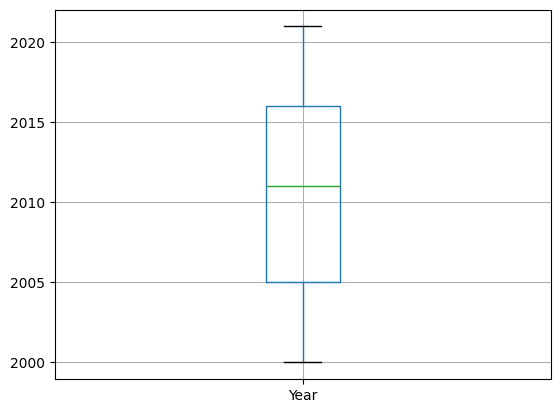

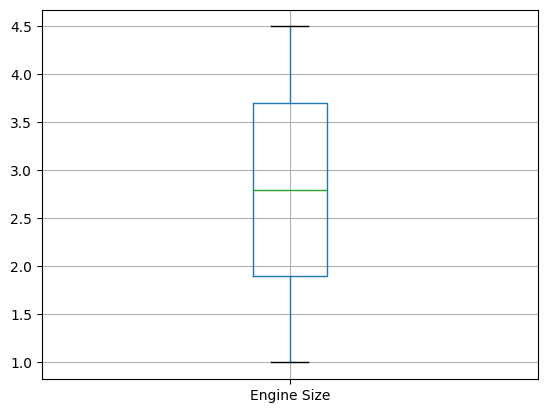

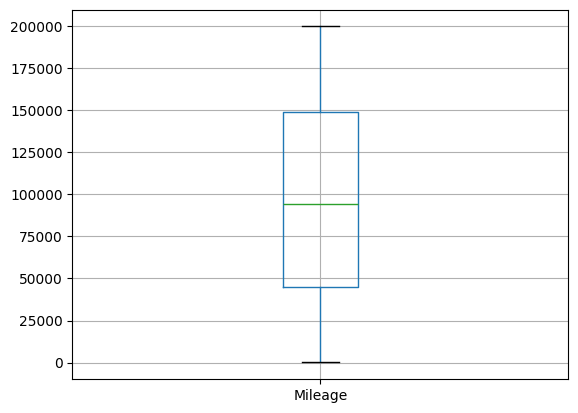

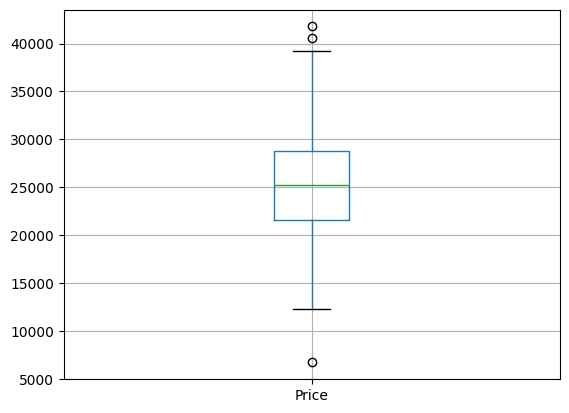

In [60]:
# Check using the boxplot.
for i in data.columns:
    if data[i].dtype == 'int':
        data.boxplot(column= i)
    if data[i].dtype == 'float':
        data.boxplot(column= i)
    plt.show()

### Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    data[x]=le.fit_transform(data[x])

### Assumption 2: Assumption of Linearity

In [64]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission', 'Price'],
      dtype='object')

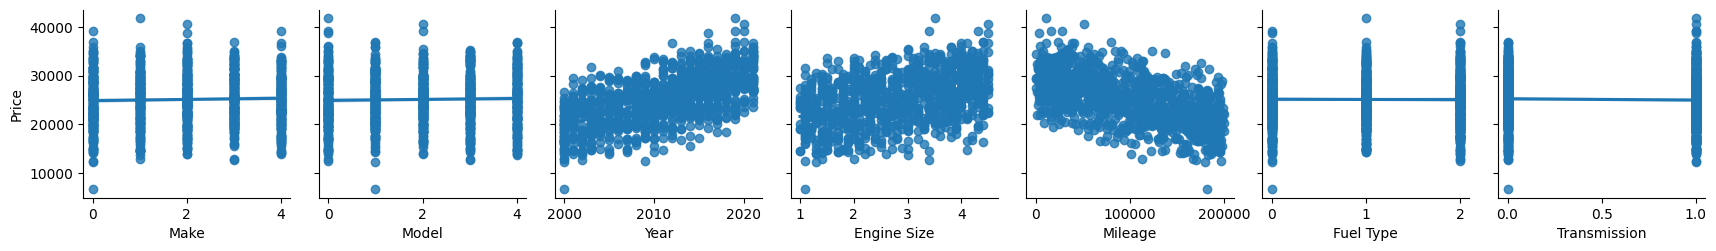

In [66]:
#check pairplot

sns.pairplot(data, x_vars=['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission'],y_vars=['Price'],kind='reg')
plt.show();

### Create X and Y

In [67]:
X = data.loc[:,['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission']]
Y = data.loc[:,'Price']

In [68]:
print(X.shape)
print(Y.shape)

(1000, 7)
(1000,)


### Assumption 3: Assumption of Normality

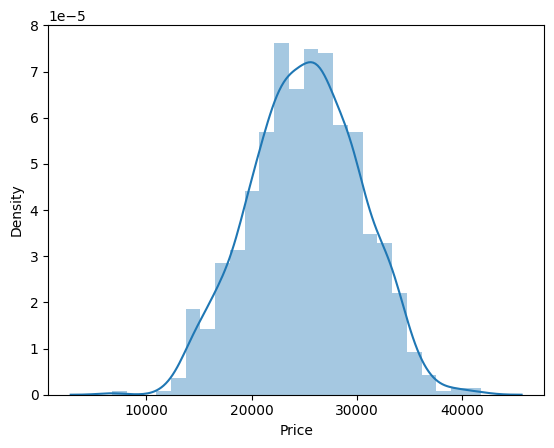

In [69]:
# check with distplot

sns.distplot(Y)
plt.show()

**The dependent variable follows an approximate normal distribution**

#### Normality check for independent variables

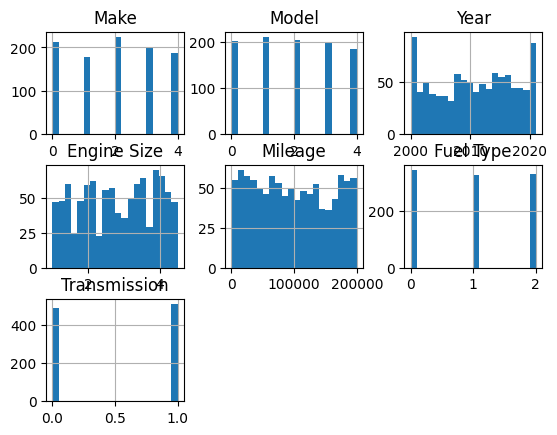

In [70]:
X.hist(bins=20)
plt.show();

### Assumption 4: Assumption of No Multicollinearity

                  Make     Model      Year  Engine Size   Mileage  Fuel Type  \
Make          1.000000  0.010440  0.025570     0.026128 -0.018482  -0.042824   
Model         0.010440  1.000000  0.021769     0.021205 -0.008635  -0.033700   
Year          0.025570  0.021769  1.000000    -0.012190  0.016376  -0.039133   
Engine Size   0.026128  0.021205 -0.012190     1.000000 -0.014815  -0.015248   
Mileage      -0.018482 -0.008635  0.016376    -0.014815  1.000000  -0.039017   
Fuel Type    -0.042824 -0.033700 -0.039133    -0.015248 -0.039017   1.000000   
Transmission  0.004745 -0.007075 -0.007501     0.030035  0.058043   0.016177   

              Transmission  
Make              0.004745  
Model            -0.007075  
Year             -0.007501  
Engine Size       0.030035  
Mileage           0.058043  
Fuel Type         0.016177  
Transmission      1.000000  


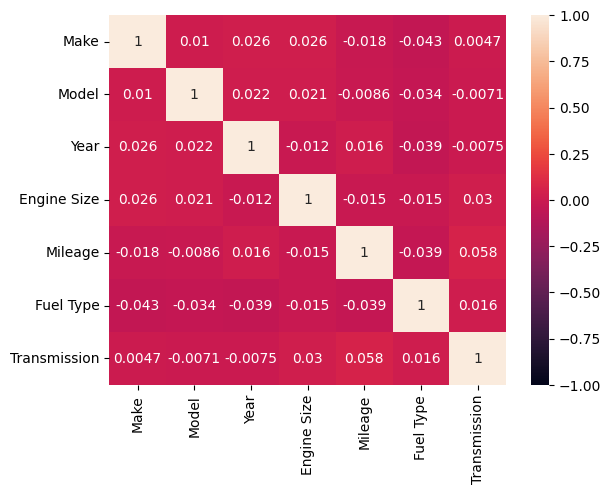

In [71]:
corr_df = X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show();

**We can observe from the above heatmap that the variables are independent of each other.**

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,Make,2.98
1,Model,2.95
2,Year,17.61
3,Engine Size,8.49
4,Mileage,3.70
5,Fuel Type,2.46
6,Transmission,2.05


**For now we are going to retain the 'Year' and 'Engine Size' variables since both these variables are important for further analysis regarding price prediction.**

## Split the data

In [114]:
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# print ("Percent of train data", X_train.shape[0]/X.shape[0]*100)

(800, 7)
(200, 7)
(800,)
(200,)


## Model - Building, Evaluating, Tuning

### Linear Regression

In [153]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

-1014611.010662716
[-6.36938484e+00 -7.96423705e+00  5.16709026e+02  1.97007428e+03
 -4.87358383e-02  1.10684128e+01  4.40350580e+01]


In [154]:
print(list(zip(X.columns, lm.coef_)))

[('Make', np.float64(-6.369384842938389)), ('Model', np.float64(-7.964237047236086)), ('Year', np.float64(516.7090262168094)), ('Engine Size', np.float64(1970.074279549281)), ('Mileage', np.float64(-0.04873583829432526)), ('Fuel Type', np.float64(11.068412755322138)), ('Transmission', np.float64(44.03505801941573))]


In [155]:
Y_pred = lm.predict(X_test)

In [157]:
new_df = pd.DataFrame()
new_df = X_test.copy()

new_df['Actual sales'] = Y_test
new_df['Predicted sales'] = Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [158]:
new_df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Actual sales,Predicted sales
0,0,1,2008,1.8,16065,0,1,27902.287879,25739.977263
1,0,4,2015,2.8,50355,2,1,30526.272863,29654.106945
2,1,2,2008,2.2,8711,1,0,26754.650724,26839.110062
3,0,1,2018,3.2,141408,2,0,28641.336358,27534.577104
4,1,4,2014,2.4,60289,1,0,28425.173270,27803.753534
...,...,...,...,...,...,...,...,...,...
195,4,3,2018,2.4,134511,1,1,29503.558296,26286.209389
196,0,0,2015,3.2,128515,2,1,26579.614909,26664.800484
197,0,2,2009,1.4,67396,1,0,25966.845649,22926.066379
198,1,1,2019,2.5,110507,2,1,27664.288735,28215.885947


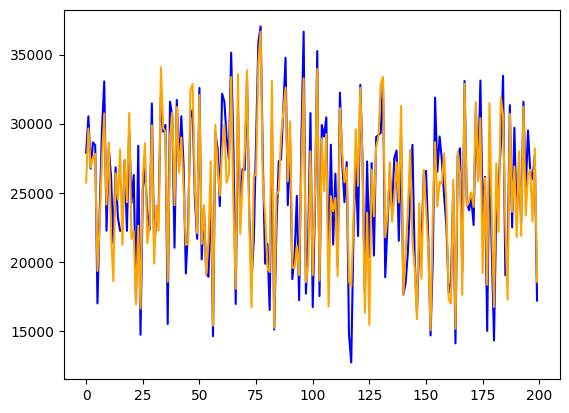

In [159]:
new_df["Actual sales"].plot(color="blue")
new_df["Predicted sales"].plot(color="orange")
plt.show()

#### Evaluate the model

In [121]:
lm.score(X_train, Y_train)

0.8441542300410732

In [156]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8210219487726007
RMSE: 2213.1506894493846
Adj R-square: 0.8197589988143428


#### Tuning the model

##### Ridge

In [123]:
from sklearn.linear_model import Ridge

rid = Ridge()
rid.fit(X_train,Y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [124]:
Y_pred = rid.predict(X_test)

In [125]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8210512566083613
RMSE: 2212.9694792059395
Adj R-square: 0.8197885134594284


##### LASSO

In [84]:
from sklearn.linear_model import Lasso
# Create a model object
lasso = Lasso()
# Train the emodel object
lasso.fit(X_train,Y_train)

# Print intercept and cofficients
print(lasso.intercept_)
print(lasso.coef_)

-1014516.9995817723
[-5.86910161e+00 -7.49968898e+00  5.16664312e+02  1.96915717e+03
 -4.87359292e-02  9.65505081e+00  4.01437201e+01]


In [85]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8210219487726007
RMSE: 2213.1506894493846
Adj R-square: 0.8197589988143428


### Decision Tree Regressor

In [107]:
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [108]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree = DecisionTreeRegressor(random_state=42,criterion='squared_error')
#min_samples_leaf, min_samples_split, max_split, max_features, max_leaf_nodes

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

In [109]:
model_DecisionTree.score(X_train, Y_train)

1.0

**The Decision Tree Model seems to be overfitted.**

#### Evaluation

In [110]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6018727816623135
RMSE: 3300.8214475116256
Adj R-square: 0.5990634162103339


#### Tuning

In [111]:
#predicting using the Decision_Tree_Regressor
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree = DecisionTreeRegressor(random_state=42,max_depth=10,min_samples_leaf=4)
#min_samples_leaf, min_samples_split, max_split, max_features, max_leaf_nodes

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

In [112]:
model_DecisionTree.score(X_train, Y_train)

0.9161967728640168

In [113]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7232377915387574
RMSE: 2752.1017816436733
Adj R-square: 0.7212848324064705


### Random Forest Regressor

In [137]:
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [138]:
#predicting using the Random_Forest_Regressor
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators= 100, random_state= 42)
model_RF.fit(X_train, Y_train)

Y_pred = model_RF.predict(X_test)

In [139]:
model_RF.score(X_train, Y_train)

0.9723619890807663

#### Evaluation

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

#### Tuning

In [144]:
#predicting using the Random_Forest_Regressor
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators= 100, random_state= 42,max_depth=15,min_samples_leaf=5)
model_RF.fit(X_train, Y_train)

Y_pred = model_RF.predict(X_test)

In [145]:
model_RF.score(X_train, Y_train)

0.9036102829422981

In [148]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8051811637812378
RMSE: 2309.0140210439026
Adj R-square: 0.803806434090178


### Comparing all models

**Linear Regression**  
R-squared: 0.8210219487726007  
RMSE: 2213.1506894493846  
Adj R-square: 0.8197589988143428  

**Base Decision Tree Regressor**  
R-squared: 0.6018727816623135  
RMSE: 3300.8214475116256  
Adj R-square: 0.5990634162103339  

**Tuned Decision Tree Regressor**  
R-squared: 0.7232377915387574  
RMSE: 2752.1017816436733  
Adj R-square: 0.7212848324064705  

**Base Random Forest Regressor**  
R-squared: 0.793778893136633  
RMSE: 2375.6237286120577  
Adj R-square: 0.7923237038744922  

**Tuned Random Forest Regressor**  
R-squared: 0.8051811637812378  
RMSE: 2309.0140210439026  
Adj R-square: 0.803806434090178  

**Linear Regression Model gives the best predictions out of all the models built thus far.**